In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillageDataset",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
classnames = dataset.class_names
classnames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

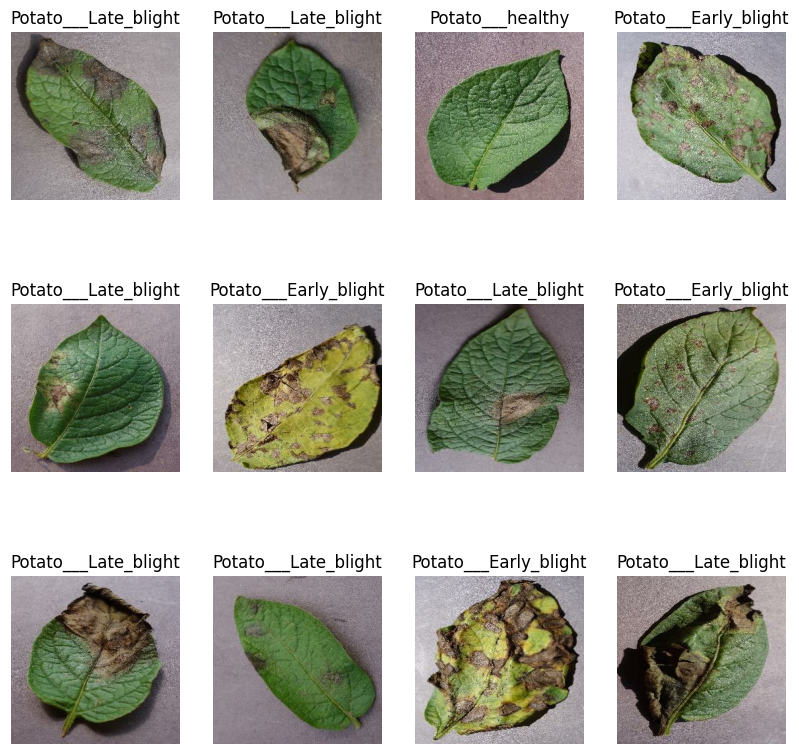

In [8]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(classnames[label_batch[i]])

In [9]:
len(dataset)

68

In [10]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [11]:
len(train_ds)
len(test_ds)

14

In [12]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if(shuffle):
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(
        32,
        (3, 3),
        activation='relu',
        input_shape = input_shape,
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(
        64, 
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(
        64, 
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(
        64, 
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(
        64, 
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(
        64, 
        kernel_size = (3, 3),
        activation = 'relu'
    ),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

In [28]:
model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 3)             0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_21 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 136s 2s/step - loss: 0.8852 - accuracy: 0.4988 - val_loss: 0.7257 - val_accuracy: 0.5677
Epoch 2/50
54/54 [==============================] - 127s 2s/step - loss: 0.5817 - accuracy: 0.7384 - val_loss: 0.3882 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 109s 2s/step - loss: 0.3783 - accuracy: 0.8380 - val_loss: 0.3160 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 106s 2s/step - loss: 0.3305 - accuracy: 0.8623 - val_loss: 0.4157 - val_accuracy: 0.8073
Epoch 5/50
54/54 [==============================] - 100s 2s/step - loss: 0.2897 - accuracy: 0.8883 - val_loss: 0.3656 - val_accuracy: 0.8594
Epoch 6/50
54/54 [==============================] - 95s 2s/step - loss: 0.2632 - accuracy: 0.8889 - val_loss: 0.1977 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 96s 2s/step - loss: 0.2732 - accuracy: 0.8924 - val_loss: 0.2818 - val_accuracy: 0.8750
Epoch 8/50
54/5

In [32]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 10s 556ms/step - loss: 0.2048 - accuracy: 0.9375


In [33]:
scores

[0.20477154850959778, 0.9375]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
history.history['accuracy']

[0.49884259700775146,
 0.7384259104728699,
 0.8379629850387573,
 0.8622685074806213,
 0.8883101940155029,
 0.8888888955116272,
 0.8923611044883728,
 0.9131944179534912,
 0.9131944179534912,
 0.9444444179534912,
 0.9513888955116272,
 0.9681712985038757,
 0.9785879850387573,
 0.9820601940155029,
 0.9629629850387573,
 0.9762731194496155,
 0.9837962985038757,
 0.9762731194496155,
 0.9704861044883728,
 0.9803240895271301,
 0.9849537014961243,
 0.9849537014961243,
 0.9820601940155029,
 0.9681712985038757,
 0.9768518805503845,
 0.9855324029922485,
 0.9733796119689941,
 0.9849537014961243,
 0.9947916865348816,
 0.9837962985038757,
 0.9861111044883728,
 0.9849537014961243,
 0.9936342835426331,
 0.9936342835426331,
 0.9918981194496155,
 0.9918981194496155,
 0.9681712985038757,
 0.9780092835426331,
 0.9936342835426331,
 0.9942129850387573,
 0.9826388955116272,
 0.9901620149612427,
 0.9884259104728699,
 0.9930555820465088,
 0.9872685074806213,
 0.9918981194496155,
 0.9953703880310059,
 0.991898119

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training And Validation Accuracy')

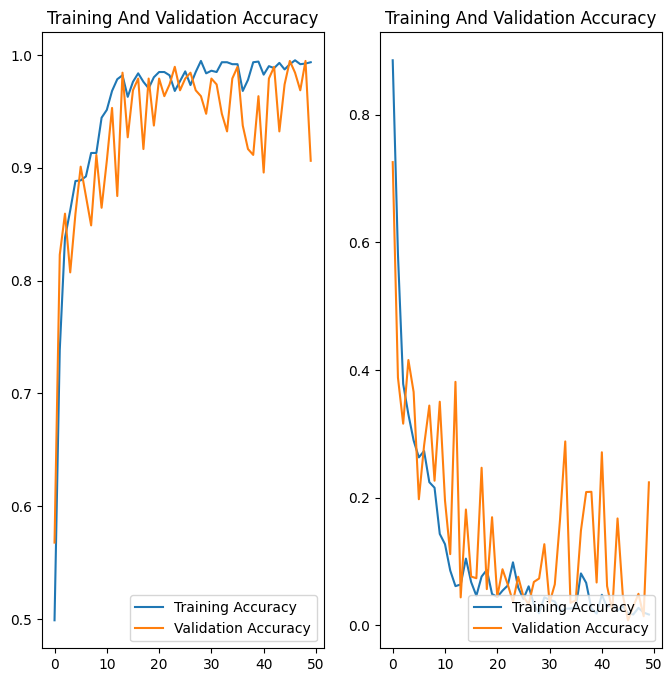

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

First image to predict
First image's actual label: Potato___healthy
1/1 [==============================] - 1s 608ms/step
Prediction:  Potato___Late_blight


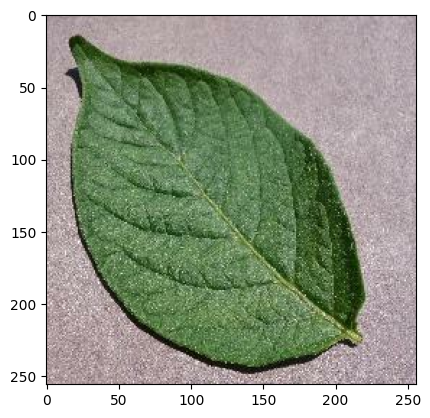

In [62]:
import numpy as np 

for images_batch, label_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    print("First image's actual label:", classnames[first_label])

    batch_prediction = model.predict(image_batch)
    print("Prediction: ", classnames[np.argmax(batch_prediction[0])])

In [78]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classnames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


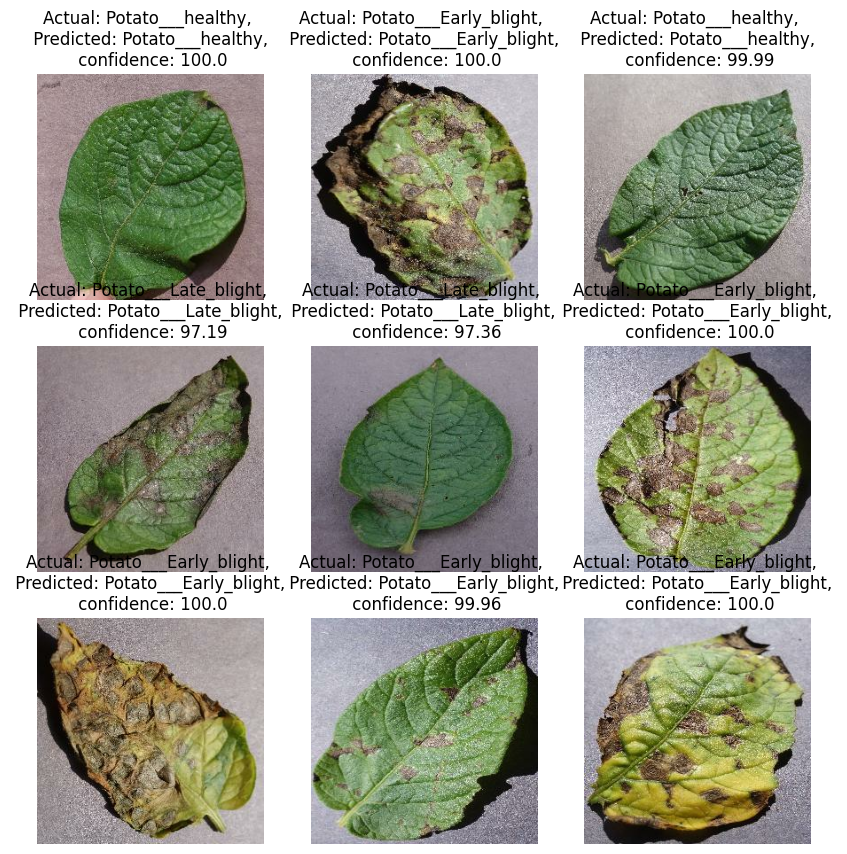

In [80]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i])
        actual_class = classnames[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n confidence: {confidence}")

        plt.axis('off')

In [93]:
import os
max = max([int(i) for i in os.listdir("../Potato_Blight_Classification/App/models")])


In [94]:
model_version = max+1
model.save(f"../Potato_Blight_Classification/App/models/{model_version}")

INFO:tensorflow:Assets written to: ../Potato_Blight_Classification/App/models/2\assets


INFO:tensorflow:Assets written to: ../Potato_Blight_Classification/App/models/2\assets
